In [1]:
import pandas as pd 

In [2]:
output = pd.read_csv("Data/final_output.csv")

### assumptions for scenario analysis (low, medium, high)
- level of utility loss --> this relates to the habitability of "usable" buildings

### Building Usability (red tagging)
- Slight Damage: 100% Fully Usable
- Moderate Damage: 87% Fully Usable, 13% partially usable, 0% not usable
- Extensive Damage: 22% Fully Usable, 25% partially usable, 53% not usable
- Complete Damage: 0% Fully Usable, 2% partially Usable, 98% not usable

### Utility Loss Level
- low:
- medium:
- high:
- 
**related to the proportion of total buildings that are categorized with Extensive OR Complete Buildings**

UL_SEVERITY = {
    "low": {"FU":[.05,0.1], "PU": [0.05,.1]},
    "medium":{"FU": [0,.1], "PU": [.3,.5]},
    "high":{"FU": [.1,.3], "PU": [.6, .8]}
    }

### Building Habitability (Related to Power & Water Utility Loss)
- low: 
    - 5-10% of Fully Usable Buildings are **not habitable** due to utility loss
    - 5-10% of Partially Usable Buildings are **not habitable** due to utility loss
- medium:
- high:



In [3]:
output

,GEOID,max_intensity,population,Total_Num_Building,risk_level,BHI_factor_low,shelter_seeking_low,Total_Num_Building_Slight,Total_Num_Building_Moderate,Total_Num_Building_Extensive,Total_Num_Building_Complete,SVI_Value,SVI_Value_Mapped
0,6055200501,0.54,5159,1364.0,low,0.0966,149.57427,605.408212,3.847731e+02,9.186632e+01,3.207327e+01,0.8482,0.3
1,6055200504,0.50,6577,1483.0,low,0.0632,124.76973,716.302826,3.173575e+02,5.250708e+01,1.328479e+01,0.8705,0.3
2,6055200301,0.50,5602,1433.0,low,0.0599,100.60920,696.298494,3.069323e+02,4.509956e+01,1.086898e+01,0.9483,0.3
3,6095251802,0.34,3132,721.0,low,0.0959,90.08190,244.496228,1.780325e+02,7.552994e+01,6.311810e+00,0.9877,0.3
4,6055201004,0.32,6836,1615.0,low,0.0584,79.77838,566.650221,2.513993e+02,8.679957e+01,5.394379e+00,0.6287,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,6075980501,0.02,125,16.0,low,0.0000,NaN,0.000766,2.509956e-08,1.609426e-13,7.737967e-20,-999.0000,NaN
2250,6075980200,0.02,79,37.0,low,0.0000,NaN,0.000031,1.872836e-11,5.278099e-19,5.816519e-28,-999.0000,NaN
2251,6041122000,0.02,3669,197.0,low,0.0000,NaN,0.009973,2.864863e-08,6.963310e-16,6.843650e-27,-999.0000,NaN
2252,6109985202,0.01,2734,76.0,low,0.0000,NaN,0.000114,1.346072e-10,4.117328e-18,4.540028e-27,-999.0000,NaN


## buildings

In [5]:
output[["Total_Num_Building", "Total_Num_Building_Slight", "Total_Num_Building_Moderate", "Total_Num_Building_Extensive", "Total_Num_Building_Complete"]].sum().round(4)




Total_Num_Building              2.937237e+06
Total_Num_Building_Slight       2.897726e+04
Total_Num_Building_Moderate     8.153343e+03
Total_Num_Building_Extensive    1.036409e+03
Total_Num_Building_Complete     1.586960e+02
dtype: float64

In [5]:
output.columns

Index(['GEOID', 'max_intensity', 'population', 'Total_Num_Building',
       'risk_level', 'BHI_factor_low', 'shelter_seeking_low',
       'Total_Num_Building_Slight', 'Total_Num_Building_Moderate',
       'Total_Num_Building_Extensive', 'Total_Num_Building_Complete',
       'SVI_Value', 'SVI_Value_Mapped'],
      dtype='object')

### Part 4 Output

In [10]:
p4 = output[["GEOID", "Total_Num_Building", "max_intensity", "Total_Num_Building_Slight",
        "Total_Num_Building_Moderate", "Total_Num_Building_Extensive", 
        "Total_Num_Building_Complete"]]
p4[["Total_Num_Building_Slight",
    "Total_Num_Building_Moderate", 
    "Total_Num_Building_Extensive",
    "Total_Num_Building_Complete"]].sum()



Total_Num_Building_Slight       28977.256330
Total_Num_Building_Moderate      8153.342769
Total_Num_Building_Extensive     1036.409517
Total_Num_Building_Complete       158.695974
dtype: float64

In [12]:
100*(p4[["Total_Num_Building_Slight",
    "Total_Num_Building_Moderate", 
    "Total_Num_Building_Extensive",
    "Total_Num_Building_Complete"]].sum() / p4["Total_Num_Building"].sum())

Total_Num_Building_Slight       0.986548
Total_Num_Building_Moderate     0.277585
Total_Num_Building_Extensive    0.035285
Total_Num_Building_Complete     0.005403
dtype: float64

In [15]:
output["risk_level"].value_counts()

risk_level
low    2254
Name: count, dtype: int64

In [19]:
100*sum(output["BHI_factor_low"]>0)/len(output["BHI_factor_low"]>0)

10.559006211180124

<Axes: >

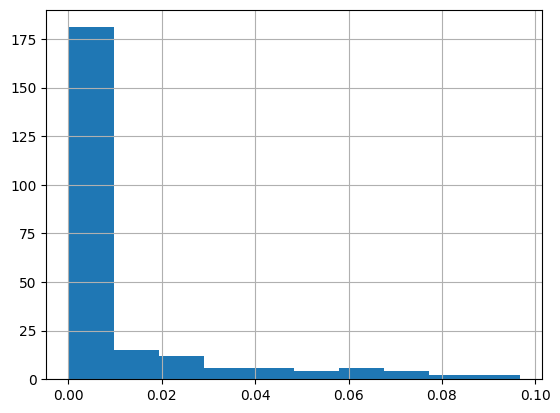

In [17]:
output[output["BHI_factor_low"]>0]["BHI_factor_low"].hist()

In [20]:
output["SVI_Value_Mapped"].value_counts()

SVI_Value_Mapped
0.2    944
0.0    814
0.3    488
Name: count, dtype: int64

In [22]:
output["shelter_seeking_low"].sum()

1924.0957900000005

def map_range(val):
    """
    if you have relatively high svi...30% of people living in potentially non habitable will seek shelter potentially.

        questions:
            1) under what SVI can we basically map the value to 0 --> .4 (above what value are you vulnerable?)
            2) for socially vuln, what proportion might seek shelter
    """
    if 0 <= val < 0.2:
        return 0 
    elif 0.2 <= val < 0.4:
        return 0 
    elif 0.4 <= val < 0.8:
        return .2
    elif 0.8 <= val <= 1.0:
        return .3
    else:
        return None 

<Axes: >

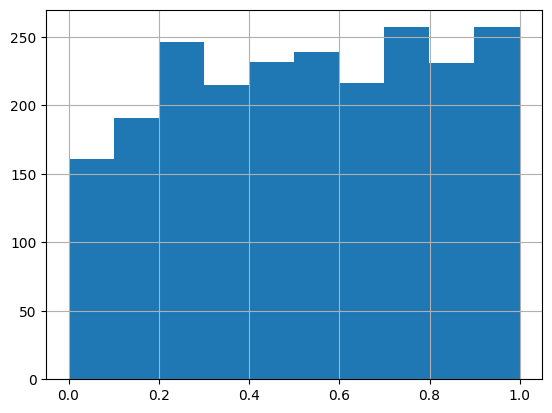

In [25]:
output[output["SVI_Value"]>0]["SVI_Value"].hist()